# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
cities


602


['albany',
 'vaini',
 'cape town',
 'sao joao da barra',
 'campo formoso',
 'bluff',
 'chuy',
 'pacific grove',
 'mys shmidta',
 'mataura',
 'rikitea',
 'mount isa',
 'atuona',
 'taolanaro',
 'ushuaia',
 'vila franca do campo',
 'villa bruzual',
 'port alfred',
 'prince rupert',
 'tuktoyaktuk',
 'lysva',
 'ribeira grande',
 'soyo',
 'hilo',
 'kamenskoye',
 'poltavka',
 'camocim',
 'puerto ayora',
 'nikolskoye',
 'severo-kurilsk',
 'iqaluit',
 'bredasdorp',
 'acapulco',
 'valparaiso',
 'new norfolk',
 'christchurch',
 'cardoso',
 'kavieng',
 'sioux city',
 'rijssen',
 'tumannyy',
 'victoria',
 'fortuna',
 'bredy',
 'necochea',
 'sorland',
 'jamestown',
 'hobart',
 'norman wells',
 'airai',
 'hermanus',
 'half moon bay',
 'georgetown',
 'interlaken',
 'sokolo',
 'lompoc',
 'avarua',
 'lebu',
 'busselton',
 'chokurdakh',
 'saldanha',
 'jiujiang',
 'tlapa',
 'bolungarvik',
 'cherskiy',
 'barrow',
 'jardim',
 'castro',
 'tuatapere',
 'punta arenas',
 'abancay',
 'tura',
 'sorvag',
 'tshikap

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# url

# Empty lists to append the API data from openweathermap
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#record call counter

record_set  = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")


#Loop through the cities in the city list 
for city in cities:
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record_set} | {city_record}")
        
        # Increase counter by one 
        record_set= record_set + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Albany
Processing Record 2 | Vaini
Processing Record 3 | Cape Town
Processing Record 4 | São João da Barra
Processing Record 5 | Campo Formoso
Processing Record 6 | Bluff
Processing Record 7 | Chui
Processing Record 8 | Pacific Grove
City not found. Skipping...
Processing Record 9 | Mataura
Processing Record 10 | Rikitea
Processing Record 11 | Mount Isa
Processing Record 12 | Atuona
City not found. Skipping...
Processing Record 13 | Ushuaia
Processing Record 14 | Vila Franca do Campo
Processing Record 15 | Villa Bruzual
Processing Record 16 | Port Alfred
Processing Record 17 | Prince Rupert
Processing Record 18 | Tuktoyaktuk
Processing Record 19 | Lys'va
Processing Record 20 | Ribeira Grande
Processing Record 21 | Soyo
Processing Record 22 | Hilo
City not found. Skipping...
Processing Record 23 | Poltavka
Processing Record 24 | Camocim
Processing Record 25 | Puerto Ayora
Processing Record 26 | Nikolskoye
Pro

Processing Record 230 | Walvis Bay
Processing Record 231 | Morales
Processing Record 232 | Mezhdurechensk
Processing Record 233 | Iskateley
City not found. Skipping...
City not found. Skipping...
Processing Record 234 | Miles City
Processing Record 235 | Idanre
Processing Record 236 | Goma
Processing Record 237 | Vao
Processing Record 238 | Srednekolymsk
Processing Record 239 | Gigmoto
Processing Record 240 | Orange Cove
Processing Record 241 | Bonthe
Processing Record 242 | Esim
Processing Record 243 | Ammon
Processing Record 244 | Baruun-Urt
Processing Record 245 | Port Shepstone
Processing Record 246 | Ulaanbaatar
Processing Record 247 | Palana
Processing Record 248 | Līsakovsk
Processing Record 249 | Pangnirtung
Processing Record 250 | Lac du Bonnet
City not found. Skipping...
Processing Record 251 | Takoradze
Processing Record 252 | Isabela
Processing Record 253 | Moose Factory
Processing Record 254 | Eureka
City not found. Skipping...
City not found. Skipping...
Processing Record

Processing Record 459 | Leningradskiy
Processing Record 460 | Marmaris
Processing Record 461 | Athabasca
Processing Record 462 | Utiel
Processing Record 463 | Tārāpur
Processing Record 464 | Arlit
Processing Record 465 | Bassila
Processing Record 466 | Coyhaique
Processing Record 467 | Ponta Delgada
Processing Record 468 | Egvekinot
Processing Record 469 | Mount Hagen
Processing Record 470 | Arrondissement de Saint-Denis
Processing Record 471 | Moree
City not found. Skipping...
Processing Record 472 | Tokur
Processing Record 473 | Alghero
Processing Record 474 | Beloha
Processing Record 475 | Zeya
Processing Record 476 | Zhigansk
Processing Record 477 | Nemuro
Processing Record 478 | Agadez
Processing Record 479 | Aksu
Processing Record 480 | Green Valley
Processing Record 481 | Serebryanyy Bor
Processing Record 482 | Marabu
Processing Record 483 | Zhezkazgan
Processing Record 484 | Bonito
City not found. Skipping...
Processing Record 485 | Guozhen
Processing Record 486 | Bargarh
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_df = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,8,US,1587107617,89,42.60,-73.97,32.00,7.94
1,Vaini,27,TO,1587107620,78,-21.20,-175.20,77.00,15.08
2,Cape Town,20,ZA,1587107337,93,-33.93,18.42,64.99,2.24
3,São João da Barra,80,BR,1587107623,89,-21.64,-41.05,74.43,12.53
4,Campo Formoso,73,BR,1587107625,79,-10.51,-40.32,70.21,6.35


In [5]:
weather_df.to_csv('Weater_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:

print(weather_df.count())
weather_df.describe()


City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64


,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,555.000000,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000
mean,52.542342,1.587108e+09,67.778378,19.997928,16.922252,59.186000,8.050396
std,37.106291,2.242631e+02,22.460625,33.721660,90.355900,22.162892,5.706040
min,0.000000,1.587107e+09,6.000000,-54.800000,-179.170000,-2.540000,0.290000
25%,17.000000,1.587108e+09,55.000000,-7.610000,-60.820000,44.305000,3.545000
50%,60.000000,1.587108e+09,72.000000,21.350000,19.140000,60.800000,6.870000
75%,90.000000,1.587108e+09,86.000000,49.045000,96.535000,78.010000,11.075000
max,100.000000,1.587108e+09,100.000000,78.220000,179.320000,106.660000,31.090000


In [7]:
#  Get the indices of cities that have humidity over 100%.
# Every city is less than <100% humidity. 

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.to_csv('City_Data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

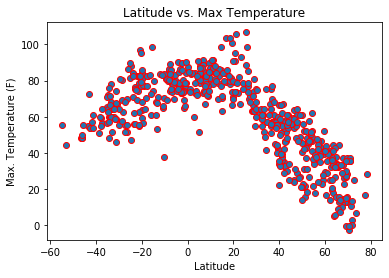

In [10]:
weather_df.head()
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],marker = 'o',edgecolors ='red')
plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")

plt.savefig('../starter_code/output_png/Max_Temp_vs_Latitude.png')
plt.show()

## Latitude vs. Humidity Plot

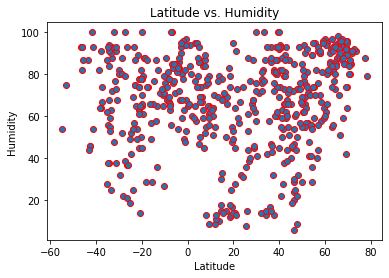

In [11]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker = 'o',edgecolors ='red')
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig('../starter_code/output_png/Humidity_vs_Latitude.png')
plt.show()

## Latitude vs. Cloudiness Plot

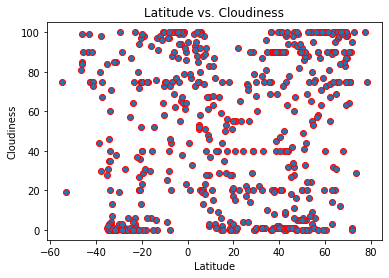

In [12]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker = 'o',edgecolors ='red')
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig('../starter_code/output_png/Cloudiness_vs_Latitude.png')
plt.show()

## Latitude vs. Wind Speed Plot

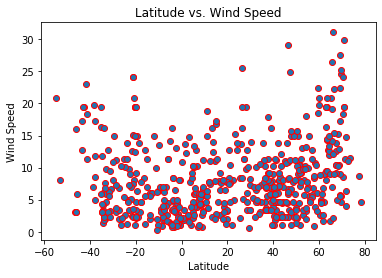

In [13]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],marker = 'o',edgecolors ='red')
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.savefig('../starter_code/output_png/Wind Speed_vs_Latitude.png')
plt.show()

## Linear Regression

The correlation between both factors is -0.64
The r-squared is: -0.6431757593247828


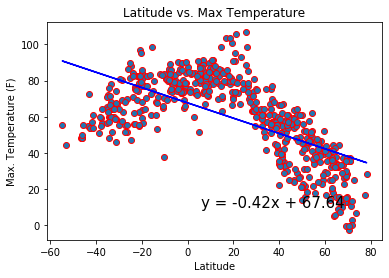

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots
import scipy.stats as st
#linear regression plot for max temp vs laitutde
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/Max_Temp_vs_Latitudewithregression.png')
plt.show()

The correlation between both factors is 0.09
The r-squared is: 0.08784634086987564


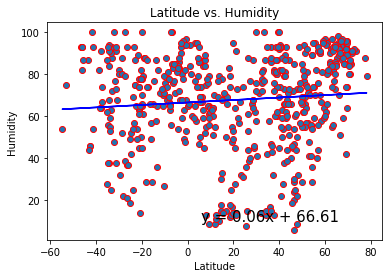

In [27]:
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/Humidity_vs_Latitudewithregression.png')
plt.show()

The correlation between both factors is 0.15
The r-squared is: 0.14592051265622838


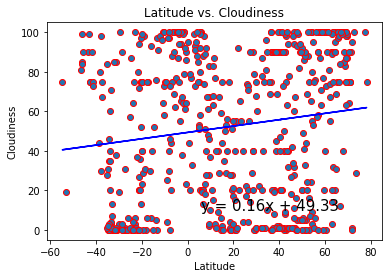

In [28]:
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/Cloudiness_vs_Latitudewithregression.png')
plt.show()

The correlation between both factors is 0.17
The r-squared is: 0.1650588493495834


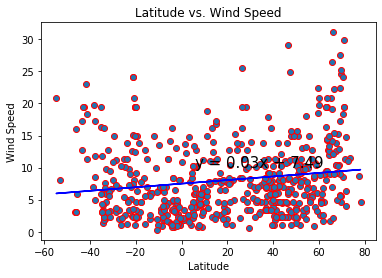

In [29]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/Wind_Speed_vs_Latitudewithregression.png')
plt.show()

In [31]:
# Northern Hemisphere data frame
northern_hem = weather_df.loc[weather_df["Lat"] >= 0, :]
northern_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,8,US,1587107617,89,42.60,-73.97,32.00,7.94
7,Pacific Grove,90,US,1587107523,93,36.62,-121.92,55.00,4.70
13,Vila Franca do Campo,20,PT,1587107637,82,37.72,-25.43,55.40,9.17
14,Villa Bruzual,67,VE,1587107639,61,9.33,-69.12,78.12,6.35
16,Prince Rupert,100,CA,1587107538,89,54.32,-130.32,46.51,3.18


In [32]:
# Southern Hemisphere DataFrames
southern_hem = weather_df.loc[weather_df["Lat"] < 0, :]
southern_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Vaini,27,TO,1587107620,78,-21.20,-175.20,77.00,15.08
2,Cape Town,20,ZA,1587107337,93,-33.93,18.42,64.99,2.24
3,São João da Barra,80,BR,1587107623,89,-21.64,-41.05,74.43,12.53
4,Campo Formoso,73,BR,1587107625,79,-10.51,-40.32,70.21,6.35
5,Bluff,81,NZ,1587107626,93,-46.60,168.33,48.00,3.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.87
The r-squared is: -0.8661558028975475


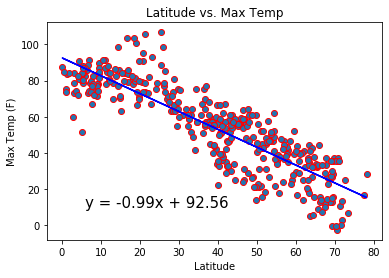

In [35]:
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Max Temp")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/NorthernMax_Temp_vs_Latitudewithregression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.6
The r-squared is: 0.5953727817723563


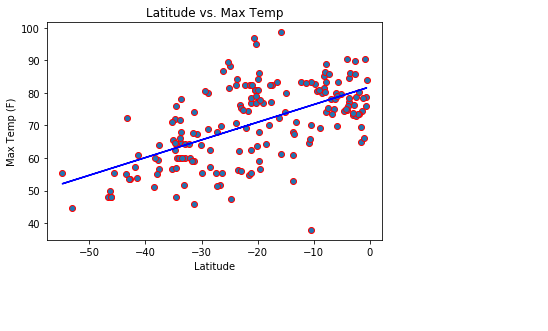

In [37]:
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Max Temp")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/southern_Max_Temp_vs_Latitudewithregression.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.31
The r-squared is: 0.3059281005195913


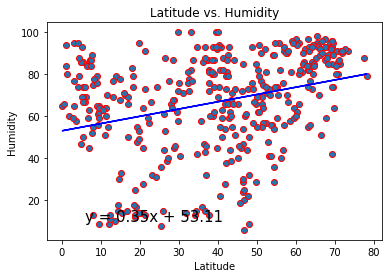

In [38]:
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/northern_Humidity_vs_Latitudewithregression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.11
The r-squared is: 0.11420103845434477


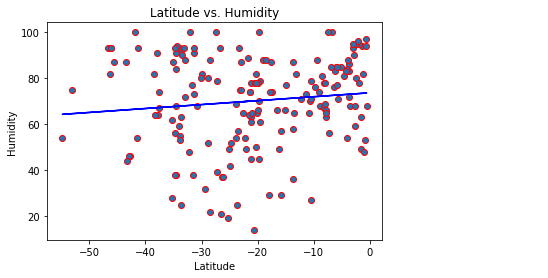

In [39]:
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/southern_Humidity_vs_Latitudewithregression.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.23
The r-squared is: 0.22785022410678574


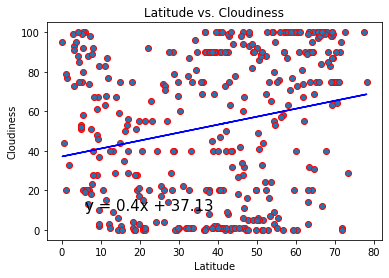

In [40]:
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/norhtern_Cloudiness_vs_Latitudewithregression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.3
The r-squared is: 0.2998862710871211


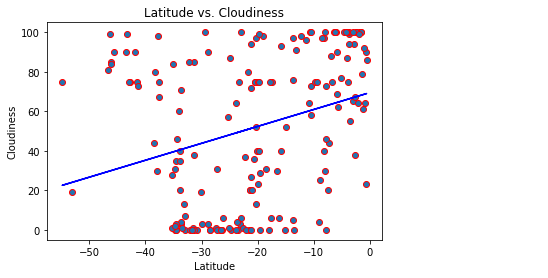

In [41]:
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/southern_Cloudiness_vs_Latitudewithregression.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.3
The r-squared is: 0.3039556710052761


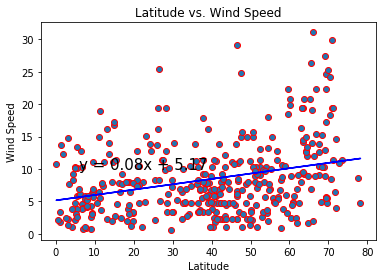

In [42]:
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/northern_Wind_Speed_vs_Latitudewithregression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.32
The r-squared is: -0.3169761296513383


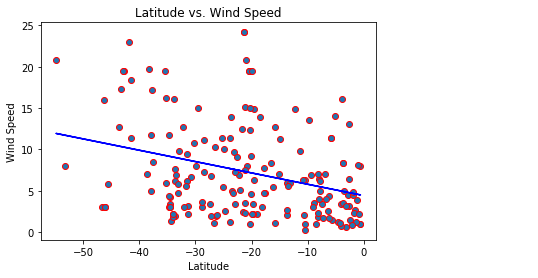

In [43]:
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,marker = 'o',edgecolors ='red')
plt.plot(x_values,regress_values,"r-",color = 'blue')
print(f"The r-squared is: {rvalue}")
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig('../starter_code/output_png/southern_Wind_Speed_vs_Latitudewithregression.png')
plt.show()

# Conclusion: 

1) As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases which is evident even with linear regression plot. 

2) No correalation is observed for Humidity vs laititude and cloudiness vs latitude. 

3) There is slight correlation with lot of outliers between wind speed and latitude. The wind speed tends to be higher near arctic and antarctic regions. 